In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = iris.data
y = iris.target


C:\Users\Youssef\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [11]:
target_names = iris.target_names


['setosa' 'versicolor' 'virginica']
PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)


In [12]:
# we can use import pca but we toke the pca code in linear Algebra 
def mean(vector):
    return float(np.sum(vector) / len(vector))


In [13]:
def std(vector):
    m = mean(vector)
    l = len(vector)
    var = sum([((x - m) ** 2) for x in vector]) / (l - 1)
    std = var ** 0.5
    return std

In [14]:
def standardize(matrix):
    returnmatrix = []
    for col in range(len(matrix[0])):
        m = mean(matrix[:, col])
        stddev = std(matrix[:, col])
        row = []
        for element in (matrix[:, col]):
            row.append((element - m) / stddev)
        returnmatrix.append(row)
    return np.transpose(returnmatrix)

In [18]:
standardized_features = standardize(X)

In [19]:
Cov = np.cov(standardized_features.T)

In [20]:
values, vectors = np.linalg.eig(Cov)

In [24]:
projected_1 = standardized_features.dot(vectors.T[0])
projected_2 = standardized_features.dot(vectors.T[1])
df = pd.DataFrame(projected_1, columns=['principal_component_1'])
df['principal_component_2'] = projected_2
df['specs'] = y

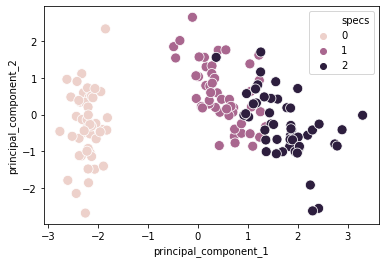

In [27]:
sns.scatterplot(df["principal_component_1"], df["principal_component_2"],hue=df['specs'], s=100)
plt.show();